<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_03_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [41]:
X_train = X_train/255
X_test = X_test/255

In [42]:
model_1 = Sequential()
model_1.add(Input(shape=(28, 28)))
model_1.add(Flatten())

In [43]:
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [44]:
model_1.compile(
    optimizer=SGD(learning_rate=0.05),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
fit_1 = model_1.fit(X_train, y_train, epochs=100,
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6330 - loss: 1.2894 - val_accuracy: 0.8929 - val_loss: 0.3875
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.3647 - val_accuracy: 0.9191 - val_loss: 0.2976
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9176 - loss: 0.2931 - val_accuracy: 0.9281 - val_loss: 0.2597
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9247 - loss: 0.2658 - val_accuracy: 0.9353 - val_loss: 0.2314
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9340 - loss: 0.2324 - val_accuracy: 0.9332 - val_loss: 0.2317
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9393 - loss: 0.2137 - val_accuracy: 0.9430 - val_loss: 0.1982
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1981 - val_accuracy: 0.9487 - val_loss: 0.1811
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9484 - loss: 0.1819 - val_accu

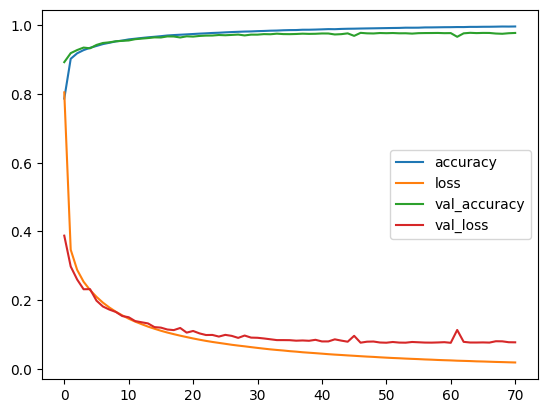

In [46]:
pd.DataFrame(fit_1.history).plot();

In [47]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0894


[0.07537907361984253, 0.9775000214576721]

In [50]:
model_1.evaluate(X_train, y_train, batch_size=256)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0219


[0.022177347913384438, 0.9955333471298218]

In [53]:
y_test_pred = fit_1.model.predict(X_test, batch_size=256).argmax(axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


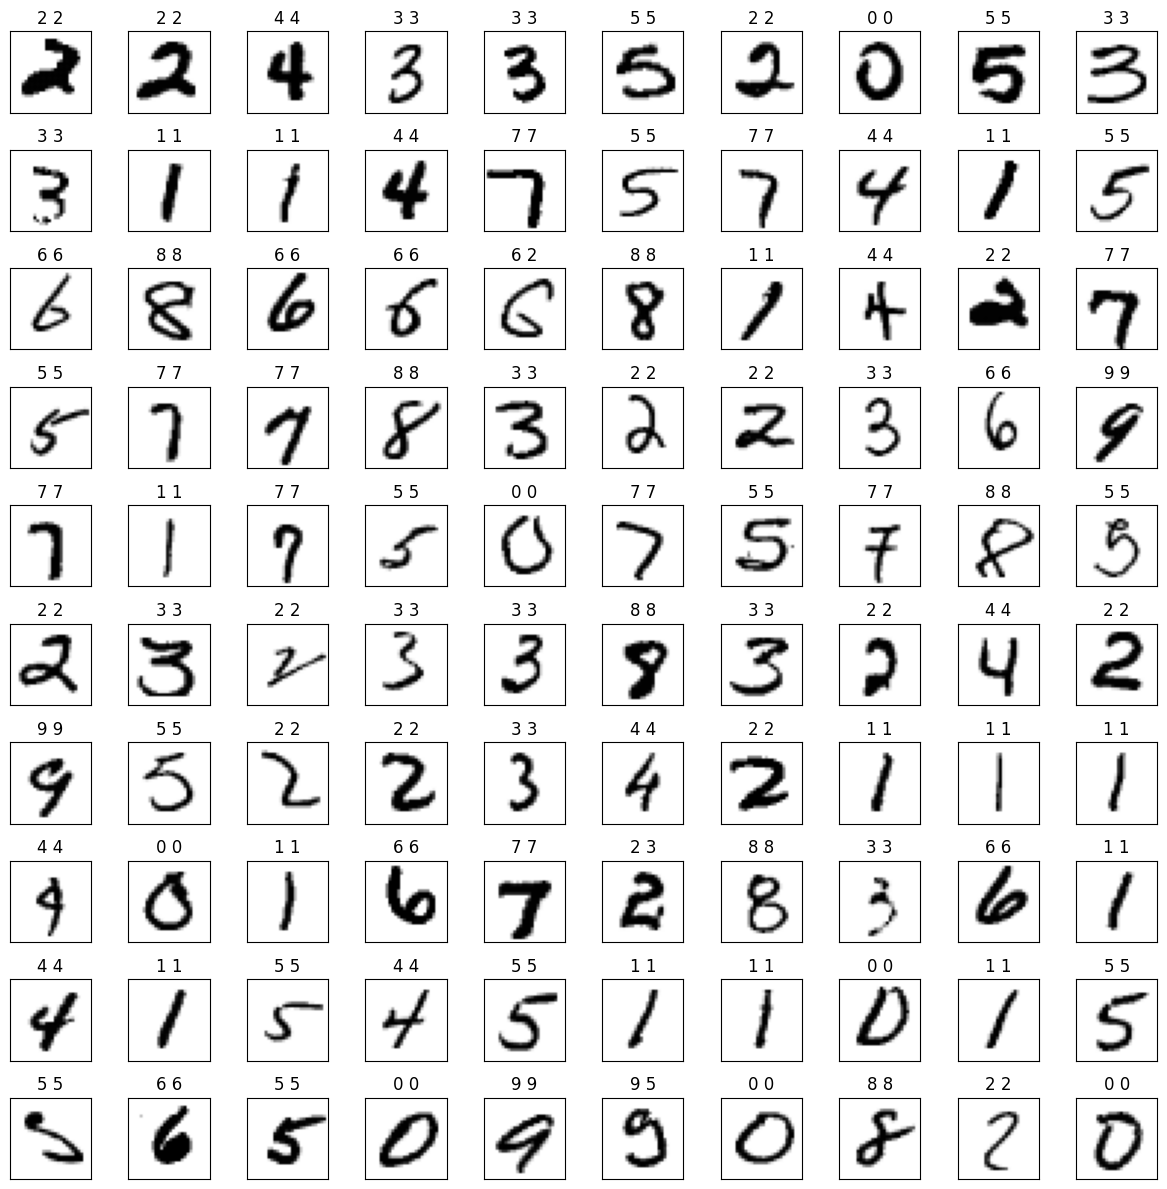

In [54]:
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
k = 0
ind = np.random.randint(10000, size=100)
for i in range(10):
  for j in range(10):
    n = ind[k]
    ax[i, j].imshow(X_test[n], cmap='gray_r')
    ax[i, j].axes.get_xaxis().set_ticks([])
    ax[i, j].axes.get_yaxis().set_ticks([])
    ax[i, j].set_title('{} {}'.format(y_test[n], y_test_pred[n]))
    k += 1
fig.tight_layout()